# Top Taxonomic Charts
### Code reads in a formatted Excel file with a number of sheets, then for each sheet creates and exports a bar chart.

In [1]:
# Individual taxonomic rank charts

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.font_manager import FontProperties

# Century Gothic for all fonts
rcParams["font.family"] = "Century Gothic"
mpl.rcParams["mathtext.fontset"] = "custom"
mpl.rcParams["mathtext.rm"] = "Century Gothic"
mpl.rcParams["mathtext.it"] = "Century Gothic:italic"

# Get path and sheet names for the data
file = pd.ExcelFile("Data/chart_data.xlsx")
sheet_names = file.sheet_names

# Iterate through all sheets
for sheet_name in sheet_names:
        
        # Read data per sheet
        df = pd.read_excel(file, sheet_name=sheet_name)
        
        # Ignore not specified
        df = df[df["Taxa"].str.lower() != "not specified"]
        
        # Keep only top 20 most mentioned taxa
        top_20 = df.sort_values(by="Count", ascending=False).head(20)
        
        # Get unique kingdoms and create colours for each
        unique_kingdoms = top_20["Kingdom"].unique()
        colors = plt.cm.Set2(range(len(unique_kingdoms)))
        color_map = dict(zip(unique_kingdoms, colors))
        
        # Bar chart
        fig, ax = plt.subplots(figsize=(12, 8), facecolor="white")
        ax.bar(
            x=top_20["Taxa"], 
            height=top_20["Count"], 
            color=top_20["Kingdom"].map(color_map),
            zorder=2
        )
        
        # Change background colour
        ax.set_facecolor("#f0f0f0")
        ax.grid(zorder=0, linestyle="-", alpha=0.7)
        
        # Legend
        legend_handles = [
            plt.Rectangle((0, 0), 1, 1, color=color_map[kingdom]) for kingdom in unique_kingdoms
        ]
        plt.legend(
            legend_handles,
            unique_kingdoms,
            title="Kingdom",
            title_fontproperties=FontProperties(weight="bold"), 
            loc="upper right",
            fontsize=12
        )
        
        # Make room for taxa image
        max_count = top_20["Count"].max()
        plt.ylim(0, max_count * 1.2) 
        
        # Remove the indicator I used in the source data
        rank = sheet_name.replace("_U", "").replace("_S", "")
        modifier = sheet_name.split("_", 1)[-1]
        #print(modifier)
        
        # Give each chart a title
        if len(top_20)==20:
            title1 = f"Top 20 IWT Occurrences of Rank {rank}" 
        else:
            title1 = f"All IWT Occurrences of Rank {rank}" 
        #plt.suptitle(title, fontsize=20, fontweight="bold", y=0.97, ha="center")
        
        if modifier == "U" or modifier == "Species":
            title2 = "Summarized by unique mentions per article"
        else:
            title2 = "Summarized at the lowest taxonomic rank per article"
        #plt.title("", fontsize=13, fontweight="light", loc="center", y=0.95, x=0.5)  

        plt.suptitle(f"{title1}\n${title2.replace(" ", "\u00A0")}$", fontsize=20, fontweight="bold", y=0.98, ha="center")
        
        plt.subplots_adjust(top=0.80, bottom=0.15)


        labels = [rf"$\mathit{{{taxa.replace(" ", "\u00A0")}}}$ ({common})" for taxa, common in zip(top_20["Taxa"], top_20["Common Name"])]
        ax.set_xticklabels(labels, rotation=45, ha="right", fontsize=12)
        #plt.xlabel("Taxon", fontsize=14, fontweight="bold")
        plt.ylabel("Count", fontsize=14, fontweight="bold")
        plt.xticks(rotation=45, ha="right") 
        plt.tight_layout()
        
        #plt.show()
        
        # Export each chart
        export = f"Output/{sheet_name}.png" 
        plt.savefig(export, dpi=600)
        
        # Close plot
        plt.close()

C:\Users\Riley\AppData\Local\Temp\ipykernel_20152\2489750368.py:90: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45, ha="right", fontsize=12)
C:\Users\Riley\AppData\Local\Temp\ipykernel_20152\2489750368.py:90: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45, ha="right", fontsize=12)
C:\Users\Riley\AppData\Local\Temp\ipykernel_20152\2489750368.py:90: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45, ha="right", fontsize=12)
C:\Users\Riley\AppData\Local\Temp\ipykernel_20152\2489750368.py:90: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xtickl

### This code reads in a separate but still formatted Excel file and creates a bar chart

C:\Users\Riley\AppData\Local\Temp\ipykernel_20152\2474357426.py:82: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45, ha="right", fontsize=12)


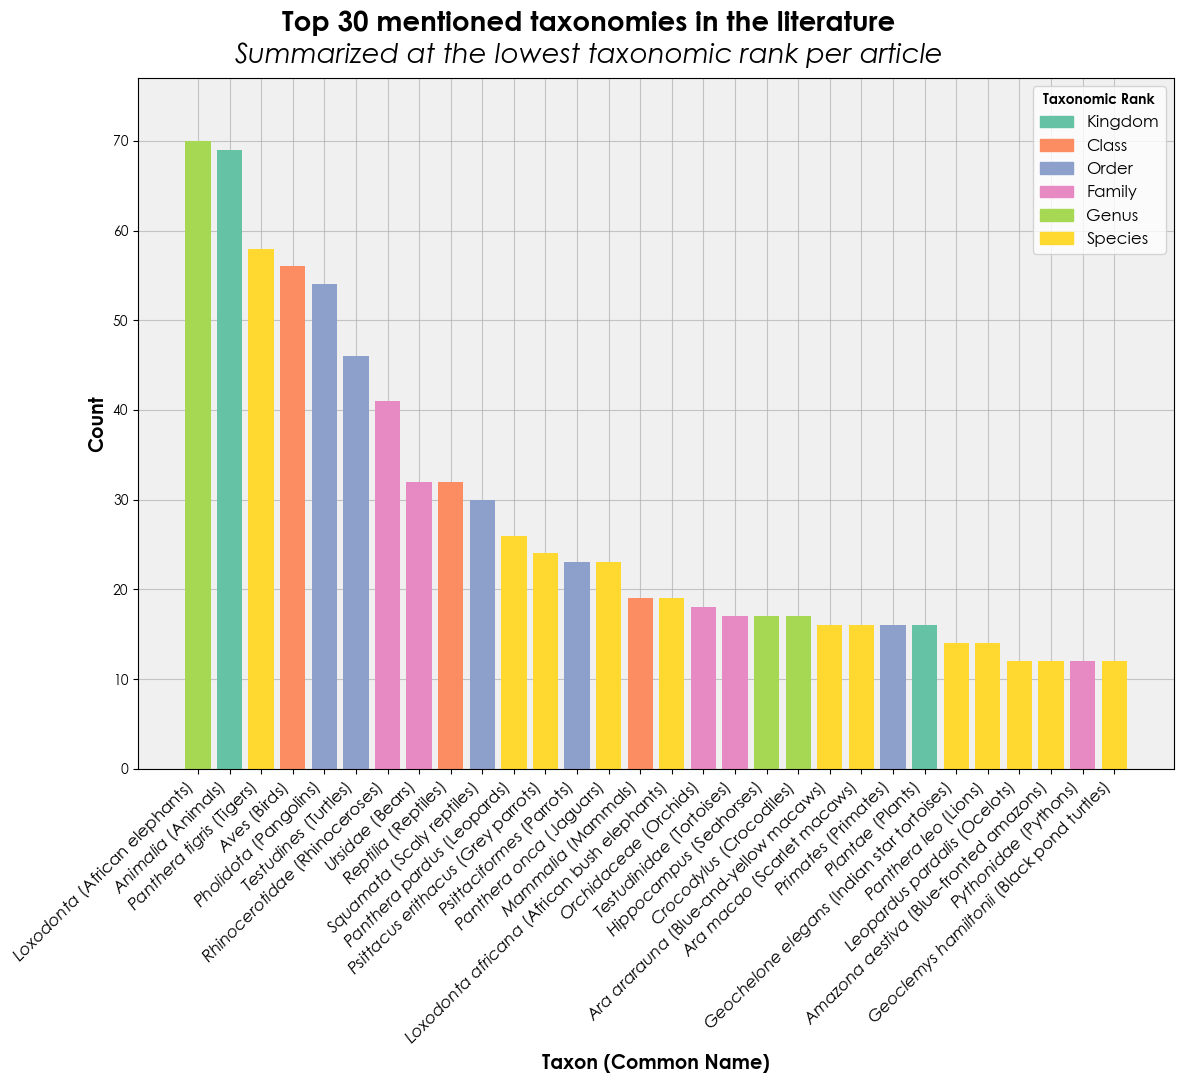

In [2]:
# To create top 30 chart

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams, font_manager
from matplotlib.font_manager import FontProperties

# Century Gothic for all fonts
rcParams["font.family"] = "Century Gothic"
mpl.rcParams["mathtext.fontset"] = "custom"
mpl.rcParams["mathtext.rm"] = "Century Gothic"
mpl.rcParams["mathtext.it"] = "Century Gothic:italic"

# Read data
df = pd.read_excel("Data/top_taxa.xlsx")

# Capitalize all ranks
df["Taxonomic Rank"] = df["Taxonomic Rank"].str.capitalize()

# Keep only top 30 most mentioned taxa
df = df.sort_values(by="Count", ascending=False).head(30)

# Manually set a rank order/priority
rank_order = ["Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Species"]

unique_rank = [rank for rank in rank_order if rank in df["Taxonomic Rank"].unique()]


colors = plt.cm.Set2(range(len(unique_rank)))
color_map = dict(zip(unique_rank, colors))

# Create plot
fig, ax = plt.subplots(figsize=(12, 11), facecolor="white")
ax.bar(
    x=df["Taxonomy"], 
    height=df["Count"], 
    color=df["Taxonomic Rank"].map(color_map),
    zorder=2
)

# Make background grey
ax.set_facecolor("#f0f0f0")

# Add grid
ax.grid(zorder=0, linestyle="-", alpha=0.7)

# Legend
legend_handles = [
    plt.Rectangle((0, 0), 1, 1, color=color_map[rank]) for rank in unique_rank
]
plt.legend(
    legend_handles,
    unique_rank,
    title="Taxonomic Rank",
    title_fontproperties=FontProperties(weight="bold"), 
    loc="upper right",
    fontsize=12
)

# Make room for taxa image
max_count = df["Count"].max()
plt.ylim(0, max_count * 1.1) 

# Add title
#plt.suptitle("Top 30 mentioned taxonomies in the literature", fontsize=20, fontweight="bold", y=0.98, x=0.537)
title1 = "Top 30 mentioned taxonomies in the literature"
# Add subtitle
#plt.title("Summarized at the lowest taxonomic rank per piece of literature", fontsize=13, fontweight="light", loc="center", y=0.995, x=0.5)  
title2 = "Summarized at the lowest taxonomic rank per article"

plt.suptitle(f"{title1}\n${title2.replace(" ", "\u00A0")}$", fontsize=20, fontweight="bold", y=0.98, ha="center")

plt.subplots_adjust(top=0.80, bottom=0.15)

# Add labels
plt.xlabel("Taxon (Common Name)", fontsize=14, fontweight="bold")
plt.ylabel("Count", fontsize=14, fontweight="bold")
#plt.xticks(rotation=45, ha="right") 
#ax.set_xticklabels([f"{taxa} ({common})" for taxa, common in zip(df["Taxonomy"], df["Common Name"])], rotation=45, ha="right", fontsize=12)
labels = [rf"$\mathit{{{taxa.replace(" ", "\u00A0")}}}$ ({common})" for taxa, common in zip(df["Taxonomy"], df["Common Name"])]
ax.set_xticklabels(labels, rotation=45, ha="right", fontsize=12)

plt.tight_layout()

# Export graph
export = "Output/Top_30_Taxa.png" 
plt.savefig(export, dpi=600)

plt.show()

# Close plot
plt.close()
